In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(df['ChestPainType'].unique(), df['Sex'].unique(),df['RestingECG'].unique(), df['ExerciseAngina'].unique(), df['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA'] ['M' 'F'] ['Normal' 'ST' 'LVH'] ['N' 'Y'] ['Up' 'Flat' 'Down']


In [4]:
label_encoder = LabelEncoder()
columns_to_encode = ['ChestPainType', 'Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 0


In [7]:
print(df.dtypes)

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


In [8]:
print(df.describe())

              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       0.781046  132.396514   198.799564   
std      9.432617    0.407701       0.956519   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.250000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.989107  136.809368        0.404139    0.887364   
std      0.423046    0.631671   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0

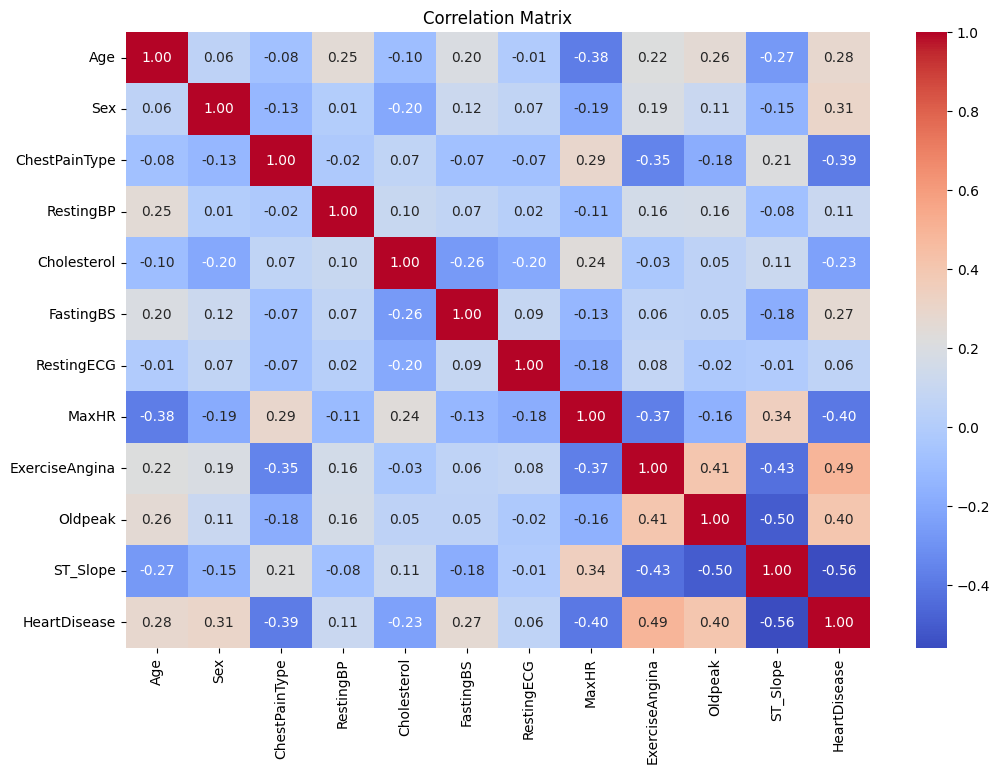

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The chart shows that people with ExerciseAngina and abnormal ST_Slope are more likely to have heart disease. Also, having a lower heart rate or certain types of chest pain might mean a higher chance of heart problems.

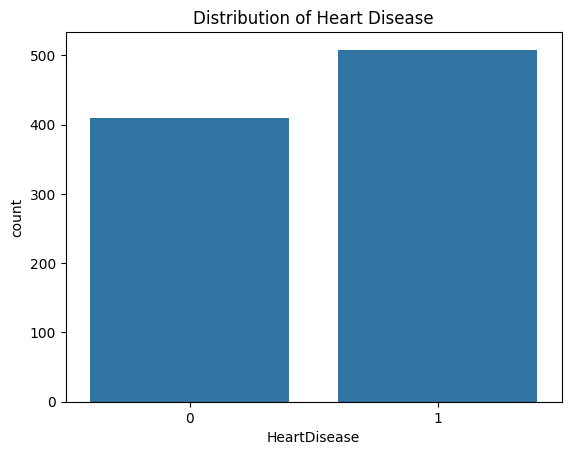

In [30]:

sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()


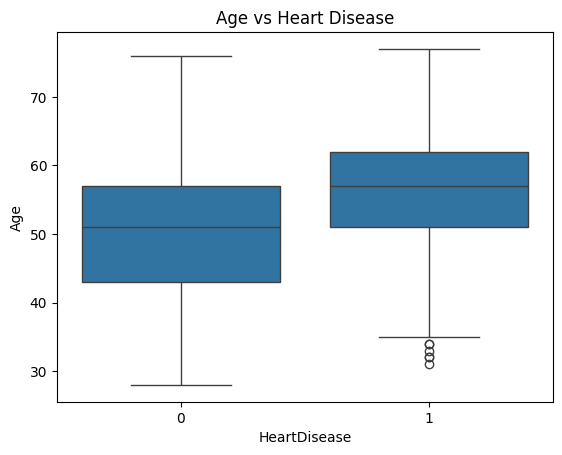

In [31]:

sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age vs Heart Disease')
plt.show()


Older individuals are more likely to have heart disease.

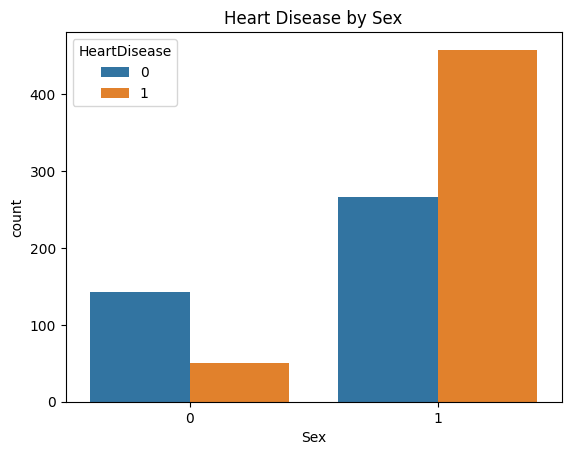

In [32]:

sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease by Sex')
plt.show()

Heart disease is more common in males than females in this dataset.

In [33]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
logistic_model = LogisticRegression(max_iter=320,solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [35]:
print("Logistic Regression Model Performance:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}')

Logistic Regression Model Performance:
[[ 86  12]
 [ 22 110]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.90      0.83      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.85      0.85       230

Accuracy: 0.85


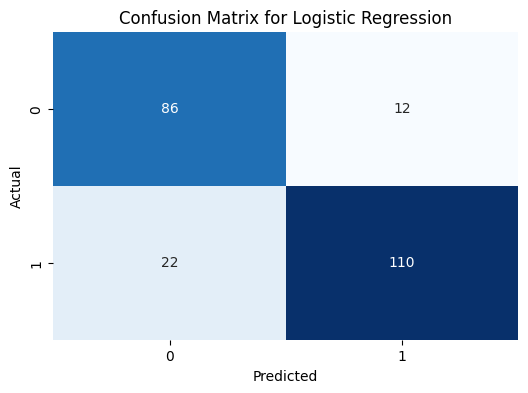

In [38]:
# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
random_forest_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
    )
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [37]:
print("Random Forest Model Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')

Random Forest Model Performance:
[[ 87  11]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230

Accuracy: 0.90


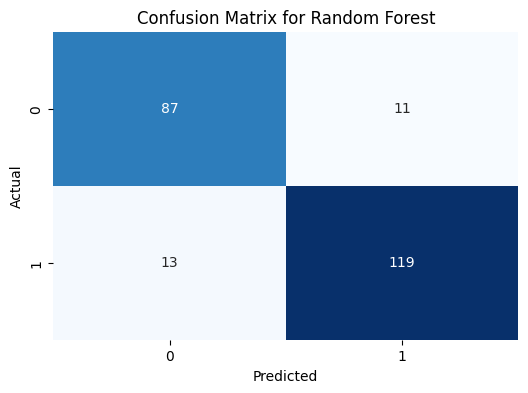

In [39]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)